## Project Milestone 2

This project is a part of the analysis of the movies data set

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

**Section 1** :
Filter the terrorism related movies

In [3]:
keywords = [ "Terrorism", "Terrorist", "Terrorists", "Jihad", "Extremism", "Extremist", "Attacks", "Attack", "Bombs", "Bombing", "Bombers", "Hijack", "Hijacking", "Kidnap", "Kidnapping", "Counterterrorism", "Counterterrorist", "Radicalization", "Radicalized", "Security Threat", "Political Violence", "Suicide Bomber", "War on Terror", "Homeland Security", "National Security", "Intelligence Agencies", "Counterinsurgency", "Terrorist Cells", "Radical Ideology", "Terrorist Plot", "Terrorist Organization", "Hostage Crisis", "Terrorism Investigation", "Counterterrorist Operation", "Radical", "Guerrilla Warfare", "Insurgency", "Terror Threat", "Covert Operations", "Political Unrest", "Martyrdom", "Cyberterrorism", "Terrorism Financing", "Violent Extremism", "Terrorist Recruitment", "Suicide Attacks", "Terrorist Sleeper Cells", "Counterterror Measures", "Clandestine Activities", "Security Intelligence" ]

In [4]:

# Define the path to your text file containing movie plots
file_path = 'data/plot_summaries.txt'

# Read the text file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t', header= None)

# Define list of keywords
movie_ids=[]
# Create a new column in the DataFrame to store the count of keywords in each movie plot
for index, row in df.iterrows():
    movie_id = row[0]
    plot = row[1]
    # Check if the plot contains any of the keywords
    for keyword in keywords:
        if keyword.lower() in plot:
            movie_ids.append(movie_id)

# Display the list of movie IDs that match the keywords
print(movie_ids)

[2231378, 5272176, 1335380, 1335380, 1335380, 1335380, 1335380, 4018288, 15585766, 15585766, 10644072, 10644072, 2254491, 447194, 447194, 12978934, 1925869, 5414895, 5425205, 5425205, 19174305, 529276, 529276, 20631892, 20631892, 2524925, 657446, 17371197, 7580720, 7580720, 3470969, 3470969, 1520023, 1520023, 14582951, 14582951, 4803289, 4803289, 1788654, 1788654, 15912738, 15912738, 3662683, 3662683, 3662683, 3662683, 3662683, 35068740, 3644125, 21450904, 6575053, 6575053, 11990695, 11990695, 3649186, 20903293, 27387452, 27387452, 235406, 235406, 4154028, 4154028, 770277, 770277, 30405742, 2322506, 2322506, 35030619, 35030619, 19332675, 19332675, 5925279, 5925279, 26499399, 26499399, 26499399, 30866673, 1373219, 1373219, 2311219, 2311219, 18563253, 6285350, 6285350, 2257358, 2257358, 9294, 9294, 5283066, 5283066, 5283066, 20887118, 20887118, 3723154, 3723154, 2274938, 2274938, 9734319, 10016740, 10016740, 10016740, 10016740, 16898363, 16898363, 33743642, 797330, 34171890, 34171890, 84

**2 Basic Data Processing**

In [5]:
#remove duplicates
set_movie_ids = set(movie_ids)


In [6]:
#import the data from movie.metadata and rename its columns
m_column_names = ['W_movie ID', 'F_movie ID', 'Movie name', 'Release date', 'Box office revenue', 'Runtime', 'Languages', 'Countries', 'Genres']
m_data = pd.read_csv('data/movie.metadata.tsv', delimiter= '\t',on_bad_lines='skip', names=m_column_names, header=0)

In [7]:
filtered_data = m_data[m_data['W_movie ID'].isin(set_movie_ids)][['W_movie ID','Movie name', 'Release date','Countries', 'Languages', 'Countries', 'Genres']]
filtered_data = filtered_data.sort_values(by=['Release date'])
display(filtered_data)

,W_movie ID,Movie name,Release date,Countries,Languages,Countries,Genres
42214,32986669,Robbery Under Arms,1907-11-02,"{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film""}","{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra..."
64189,7870349,Dr. Jekyll and Mr. Hyde,1908-03-07,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
70994,29391146,The Black Viper,1908-07-25,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}"
18652,28777800,The Englishman and the Girl,1910-02-17,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
45311,13254122,What the Daisy Said,1910-07-11,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
...,...,...,...,...,...,...,...
81156,11971266,La Guerre des tuques,NaN,"{""/m/0d060g"": ""Canada""}","{""/m/064_8sq"": ""French Language""}","{""/m/0d060g"": ""Canada""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/0hj3mt..."
81303,11515305,Buio Omega,NaN,"{""/m/03rjj"": ""Italy""}","{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/03rjj"": ""Italy""}","{""/m/03npn"": ""Horror""}"
81312,27613497,Emperor: Young Caesar,NaN,{},{},{},"{""/m/06l3bl"": ""Epic""}"
81340,27646962,Raging Sharks,NaN,"{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/03npn"": ""Horror""}"


In [8]:
filtered_data['Release year'] = filtered_data['Release date'].str[:4]
display(filtered_data)
print(filtered_data['Release year'].isna().sum())

,W_movie ID,Movie name,Release date,Countries,Languages,Countries,Genres,Release year
42214,32986669,Robbery Under Arms,1907-11-02,"{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film""}","{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",1907
64189,7870349,Dr. Jekyll and Mr. Hyde,1908-03-07,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1908
70994,29391146,The Black Viper,1908-07-25,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}",1908
18652,28777800,The Englishman and the Girl,1910-02-17,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1910
45311,13254122,What the Daisy Said,1910-07-11,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1910
...,...,...,...,...,...,...,...,...
81156,11971266,La Guerre des tuques,NaN,"{""/m/0d060g"": ""Canada""}","{""/m/064_8sq"": ""French Language""}","{""/m/0d060g"": ""Canada""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/0hj3mt...",NaN
81303,11515305,Buio Omega,NaN,"{""/m/03rjj"": ""Italy""}","{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/03rjj"": ""Italy""}","{""/m/03npn"": ""Horror""}",NaN
81312,27613497,Emperor: Young Caesar,NaN,{},{},{},"{""/m/06l3bl"": ""Epic""}",NaN
81340,27646962,Raging Sharks,NaN,"{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/03npn"": ""Horror""}",NaN


337


1907
2013


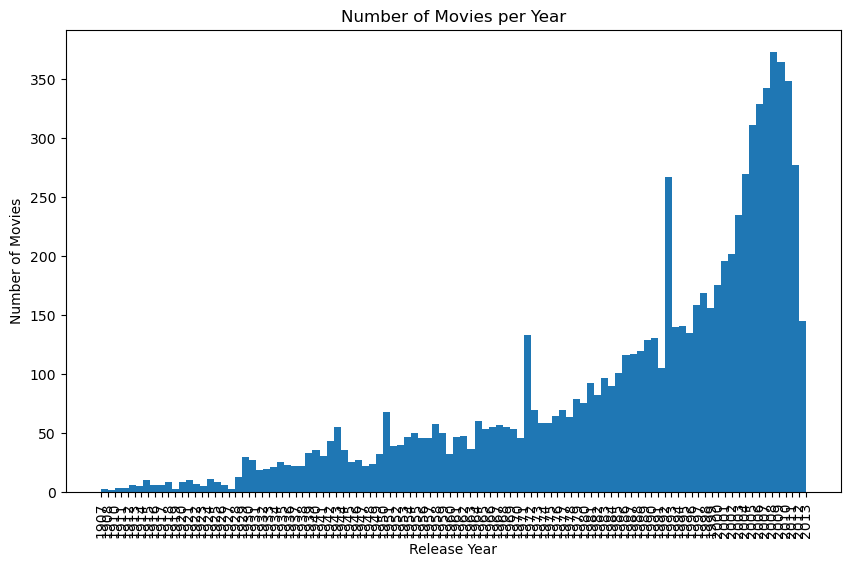

In [9]:
filtered_data.dropna(subset=['Release year'], inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(filtered_data['Release year'],bins= 100, linewidth=1.2)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
min_year = int(filtered_data['Release year'].min())
print(min_year)
max_year = int(filtered_data['Release year'].max())
print(max_year)
plt.title('Number of Movies per Year')
plt.xticks(rotation=90) # rotate the xticks by 90 degrees
plt.show()


In [10]:
filtered_data['Release year'] = pd.to_numeric(filtered_data['Release year'])
display(filtered_data['Release year'].describe())


count    8289.000000
mean     1988.098082
std        22.449217
min      1907.000000
25%      1976.000000
50%      1996.000000
75%      2006.000000
max      2013.000000
Name: Release year, dtype: float64

In [11]:
filtered_data

,W_movie ID,Movie name,Release date,Countries,Languages,Countries,Genres,Release year
42214,32986669,Robbery Under Arms,1907-11-02,"{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film""}","{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",1907
64189,7870349,Dr. Jekyll and Mr. Hyde,1908-03-07,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1908
70994,29391146,The Black Viper,1908-07-25,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}",1908
18652,28777800,The Englishman and the Girl,1910-02-17,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1910
45311,13254122,What the Daisy Said,1910-07-11,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1910
...,...,...,...,...,...,...,...,...
62760,36018402,Simanaheen,2012-12-12,"{""/m/0162b"": ""Bangladesh"", ""/m/09c7w0"": ""Unite...","{""/m/01c7y"": ""Bengali Language""}","{""/m/0162b"": ""Bangladesh"", ""/m/09c7w0"": ""Unite...","{""/m/02l7c8"": ""Romance Film""}",2012
40367,34953010,Zero Dark Thirty,2012-12-19,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/02kdv5l"": ""Actio...",2012
3303,32258845,Pain & Gain,2013-04-26,"{""/m/09c7w0"": ""United States of America""}",{},"{""/m/09c7w0"": ""United States of America""}","{""/m/05p553"": ""Comedy film"", ""/m/02kdv5l"": ""Ac...",2013
32374,35627063,The Smurfs 2,2013-07-31,"{""/m/09c7w0"": ""United States of America""}",{},"{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",2013


In [12]:

def extract_data(column):
    """
    This function extracts the data from a given pandas Series (column) using a regular expression.
    
    Parameters:
    column (pandas.Series): The column from which data is to be extracted.

    Returns:
    pandas.Series: A Series with the extracted data.
    """    
    return column.str.extract(r'":\s*"(.*?)"')

In [19]:
col= filtered_data['Countries'].str.extract(r'":\s*"(.*?)"')
col

AttributeError: 'DataFrame' object has no attribute 'str'

In [20]:
filtered_data

,W_movie ID,Movie name,Release date,Countries,Languages,Countries,Genres,Release year
42214,32986669,Robbery Under Arms,1907-11-02,"{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film""}","{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",1907
64189,7870349,Dr. Jekyll and Mr. Hyde,1908-03-07,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1908
70994,29391146,The Black Viper,1908-07-25,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}",1908
18652,28777800,The Englishman and the Girl,1910-02-17,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1910
45311,13254122,What the Daisy Said,1910-07-11,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1910
...,...,...,...,...,...,...,...,...
62760,36018402,Simanaheen,2012-12-12,"{""/m/0162b"": ""Bangladesh"", ""/m/09c7w0"": ""Unite...","{""/m/01c7y"": ""Bengali Language""}","{""/m/0162b"": ""Bangladesh"", ""/m/09c7w0"": ""Unite...","{""/m/02l7c8"": ""Romance Film""}",2012
40367,34953010,Zero Dark Thirty,2012-12-19,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/02kdv5l"": ""Actio...",2012
3303,32258845,Pain & Gain,2013-04-26,"{""/m/09c7w0"": ""United States of America""}",{},"{""/m/09c7w0"": ""United States of America""}","{""/m/05p553"": ""Comedy film"", ""/m/02kdv5l"": ""Ac...",2013
32374,35627063,The Smurfs 2,2013-07-31,"{""/m/09c7w0"": ""United States of America""}",{},"{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",2013


**External DATASET**
https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset

In [ ]:
external_data=pd.read_csv('data/movies_metadata.csv', delimiter= ',',on_bad_lines='skip', header=0)

C:\Users\User\AppData\Local\Temp\ipykernel_21616\130588527.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  external_data=pd.read_csv('data/movies_metadata.csv', delimiter= ',',on_bad_lines='skip', header=0)


In [ ]:
external_data.sample(5)
external_data.columns
col_Notto_drop= ['budget', 'genres', 'original_language', 'original_title','production_countries', 'release_date', 'revenue', 'runtime','spoken_languages']
external_data = external_data[col_Notto_drop]

external_data['movie name']= external_data['original_title'].str.lower()

# Merge the two dataframes on 'movie name' and 'Movie name' columns
merged_data = pd.merge(filtered_data, external_data, left_on='Movie name', right_on='movie name')

# Extract the IDs where the movie names match
id_list = merged_data['W_movie ID'].tolist()

# Display the list of IDs
print(id_list)
merged_data.sample(5)


[1329088, 1364770, 640040, 2465797, 18850187, 12940547, 12940547, 18436536, 24913134, 29026343, 33388421]


,W_movie ID,Movie name,Release date,Countries,Release year,budget,genres,original_language,original_title,production_countries,release_date,revenue,runtime,spoken_languages,movie name
0,1329088,1941,1979-12-14,United States of America,1979,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,1941,"[{'iso_3166_1': 'US', 'name': 'United States o...",1979-12-13,31755742.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",1941
7,18436536,2012,2009-11-11,United States of America,2009,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,2012,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2009-10-10,769653595.0,158.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",2012
1,1364770,8mm,1999-02-19,United States of America,1999,40000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",en,8MM,"[{'iso_3166_1': 'US', 'name': 'United States o...",1999-02-26,96618699.0,123.0,"[{'iso_639_1': 'en', 'name': 'English'}]",8mm
2,640040,10.5,2004-05-02,United States of America,2004,20000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,10.5,"[{'iso_3166_1': 'US', 'name': 'United States o...",2004-05-02,0.0,165.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",10.5
5,12940547,9,2009-08-19,United States of America,2009,30000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,9,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009-08-19,48428063.0,79.0,"[{'iso_639_1': 'en', 'name': 'English'}]",9
